<img src="banner.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

##### Short Pre-Processing

In [2]:
def cutdt(df):
    for idx, val in enumerate(df['confirmados']):
        if val!=0:
            where = idx
            break
    return df.iloc[where:]

In [3]:
dt = pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv')

dt = cutdt(dt).reset_index()

dt = dt.fillna(0)

dt

,index,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
0,5,02-03-2020,02-03-2020 00:00,2,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,03-03-2020,03-03-2020 16:00,4,2,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,04-03-2020,04-03-2020 17:00,6,3,1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,05-03-2020,05-03-2020 17:00,9,5,1,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,06-03-2020,06-03-2020 17:00,13,8,1,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,71,07-05-2020,07-05-2020 00:00,26715,15450,3545,6935,220,343,132,...,9.0,24.0,34.0,61.0,91.0,132.0,423.0,320.0,562.0,543.0
67,72,08-05-2020,08-05-2020 00:00,27268,15809,3564,7093,232,345,135,...,9.0,24.0,34.0,61.0,93.0,133.0,428.0,321.0,569.0,545.0
68,73,09-05-2020,09-05-2020 00:00,27406,15854,3581,7166,235,345,135,...,9.0,27.0,34.0,63.0,93.0,133.0,432.0,323.0,574.0,552.0
69,74,10-05-2020,10-05-2020 00:00,27581,15952,3581,7242,235,346,135,...,9.0,27.0,34.0,63.0,94.0,133.0,439.0,324.0,582.0,553.0


##### General Analysis

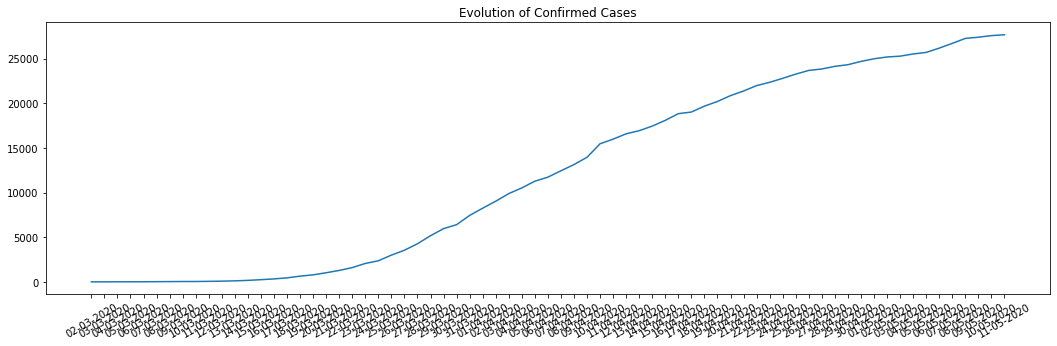

In [4]:
fig1, ax = plt.subplots(figsize=(18,5), sharex=True)

ax.plot(dt['data'],dt['confirmados'])
plt.title('Evolution of Confirmed Cases')
plt.xticks(rotation=30)
plt.show()

fig1.savefig('Daily Report/evolution_cases.png')

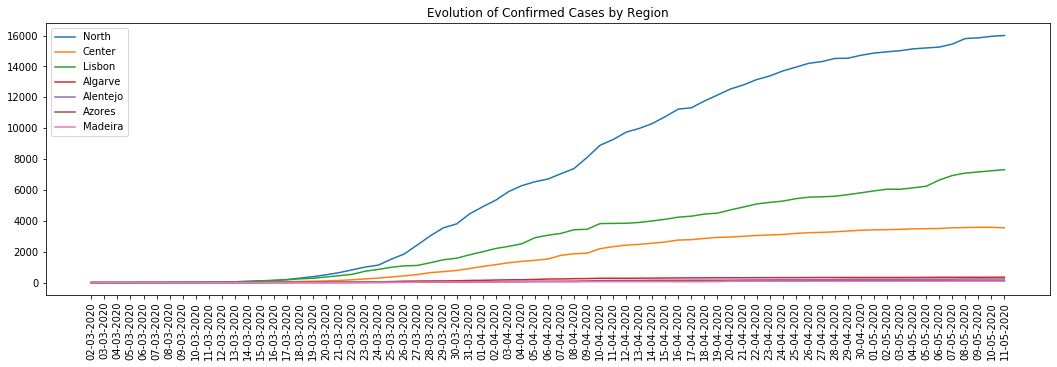

In [47]:
fig2 = plt.figure(figsize=(18,5))
plt.plot(dt['data'], 'confirmados_arsnorte', data=dt, label='North')
plt.plot(dt['data'], 'confirmados_arscentro', data=dt,label="Center")
plt.plot(dt['data'], 'confirmados_arslvt', data=dt, label='Lisbon')
plt.plot(dt['data'], 'confirmados_arsalgarve', data=dt, label='Algarve')
plt.plot(dt['data'], 'confirmados_arsalentejo', data=dt, label='Alentejo')
plt.plot(dt['data'], 'confirmados_acores', data=dt, label='Azores')
plt.plot(dt['data'], 'confirmados_madeira', data=dt, label='Madeira')
plt.legend()
plt.xticks(rotation=90)
plt.title('Evolution of Confirmed Cases by Region')
plt.show()

fig2.savefig('Daily Report/evolution_cases_byRegion.png')

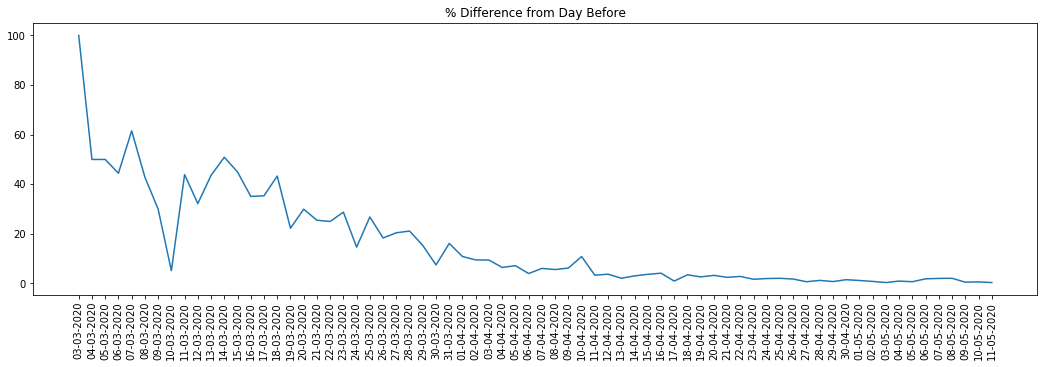

In [49]:
actuals = [x for x in dt['confirmados']]
actuals.reverse()

diff = []
for i in range(len(actuals)):
    if i != len(actuals)-1:
        difference = ((actuals[i]-actuals[i+1])/actuals[i+1])*100
        diff.append(difference)
    else:
        break
        
diff.reverse()

dates = [x for x in dt['data']][1:]

#########

fig3 = plt.figure(figsize=(18,5))
plt.plot(dates, diff)
plt.xticks(rotation=90)
plt.title('% Difference from Day Before')

fig3.savefig('Daily Report/evolution_percentage.png')

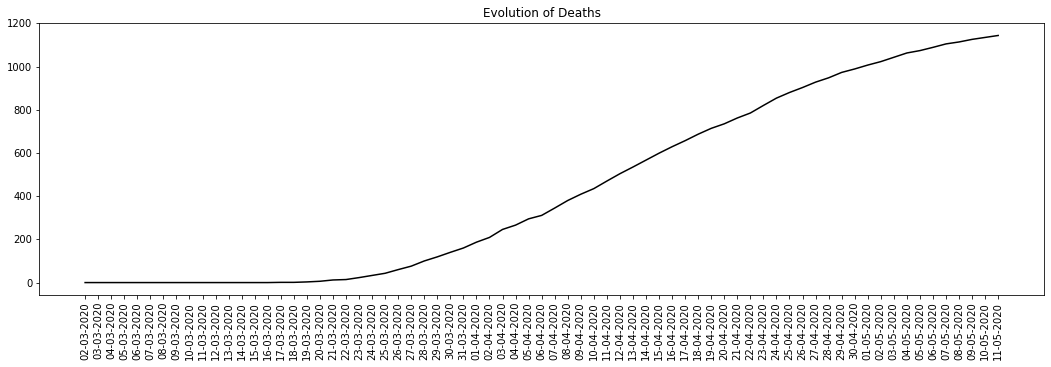

In [50]:
fig4, ax = plt.subplots(figsize=(18,5), sharex=True)

ax.plot(dt['data'],dt['obitos'], color='black')
plt.title('Evolution of Deaths')
plt.xticks(rotation=90)
plt.show()

fig4.savefig('Daily Report/evolution_deaths.png')

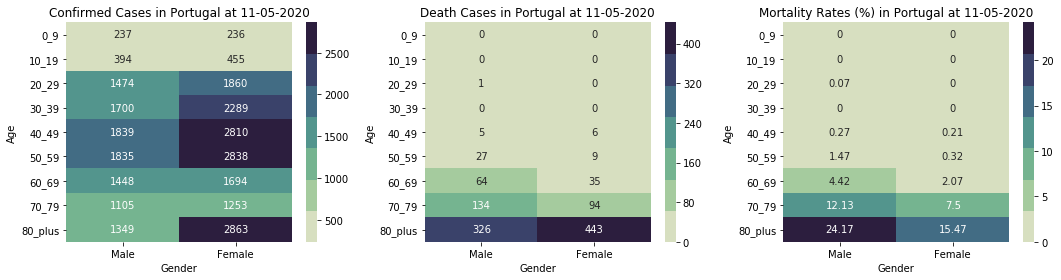

In [23]:
     ### CONFIRMED CASES

#define dictionaries
confirmados_m = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
confirmados_f = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

#create dataframe with confirmed cases
confirmados = pd.DataFrame.from_dict(confirmados_m, orient='index', columns=['Male'])
confirmados['Female'] = pd.Series(confirmados_f, name='Female')

      ### DEATH CASES

#define dictionaries
obitos_m = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
obitos_f = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

#create dataframes with death cases
obitos = pd.DataFrame.from_dict(obitos_m, orient='index', columns=['Male'])
obitos['Female'] = pd.Series(obitos_f, name='Female')


    ### DEATH RATE
    
mortalidade = round(obitos/confirmados*100,2)
    
    ### PLOT HEATMAPS

fig5, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

sns.heatmap(confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=ax1, fmt='g')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
ax1.set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[-1]['data']))
ax1.set_xlabel('Gender')
ax1.set_ylabel('Age')

sns.heatmap(obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=ax2, fmt='g')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
ax2.set_title('Death Cases in Portugal at '+ str(dt.iloc[-1]['data']))
ax2.set_xlabel('Gender')
ax2.set_ylabel('Age')

sns.heatmap(mortalidade, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=ax3, fmt='g')
bottom, top = ax3.get_ylim()
ax3.set_ylim(bottom + 0.5, top - 0.5)
ax3.set_title('Mortality Rates (%) in Portugal at ' + str(dt.iloc[-1]['data']))
ax3.set_xlabel('Gender')
ax3.set_ylabel('Age')

plt.tight_layout()

fig5.savefig('Daily Report/heatmaps_confirmed_death.png')

In [45]:
def compare_day_with_today(day):

            ### CONFIRMED CASES

    #define dictionaries for day
    day_confirmados_m = {col[:-2][12:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
    day_confirmados_f = {col[:-2][12:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

    #create dataframe with confirmed cases for day
    day_confirmados = pd.DataFrame.from_dict(day_confirmados_m, orient='index', columns=['Male'])
    day_confirmados['Female'] = pd.Series(day_confirmados_f, name='Female')

          ### DEATH CASES

    #define dictionaries for day
    day_obitos_m = {col[:-2][7:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
    day_obitos_f = {col[:-2][7:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

    #create dataframes with death cases for day
    day_obitos = pd.DataFrame.from_dict(day_obitos_m, orient='index', columns=['Male'])
    day_obitos['Female'] = pd.Series(day_obitos_f, name='Female')
    
        ### MORTALITY RATE
        
    day_mortalidade = round(day_obitos/day_confirmados*100,2)
    
        ### CONFIRMED CASES

    #define dictionaries for today
    today_confirmados_m = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
    today_confirmados_f = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

    #create dataframe with confirmed cases for today
    today_confirmados = pd.DataFrame.from_dict(today_confirmados_m, orient='index', columns=['Male'])
    today_confirmados['Female'] = pd.Series(today_confirmados_f, name='Female')

          ### DEATH CASES

    #define dictionaries for today
    today_obitos_m = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
    today_obitos_f = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

    #create dataframes with death cases for today
    today_obitos = pd.DataFrame.from_dict(today_obitos_m, orient='index', columns=['Male'])
    today_obitos['Female'] = pd.Series(today_obitos_f, name='Female')
    
         ### MORTALITY RATE
        
    today_mortalidade = round(today_obitos/today_confirmados*100,2)
    
        ### PLOT HEATMAPS

    fig6, axs = plt.subplots(3,2, figsize=(15,15))

    sns.heatmap(day_confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[0,0], fmt='g')
    bottom, top = axs[0,0].get_ylim()
    axs[0,0].set_ylim(bottom + 0.5, top - 0.5)
    axs[0,0].set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[day]['data']))
    axs[0,0].set_xlabel('Gender')
    axs[0,0].set_ylabel('Age')
    axs[0,0].set_yticklabels(axs[0,0].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(today_confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[0,1], fmt='g')
    bottom, top = axs[0,1].get_ylim()
    axs[0,1].set_ylim(bottom + 0.5, top - 0.5)
    axs[0,1].set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[-1]['data']))
    axs[0,1].set_xlabel('Gender')
    axs[0,1].set_ylabel('Age')
    axs[0,1].set_yticklabels(axs[0,1].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(day_obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[1,0], fmt='g')
    bottom, top = axs[1,0].get_ylim()
    axs[1,0].set_ylim(bottom + 0.5, top - 0.5)
    axs[1,0].set_title('Death Cases in Portugal at '+ str(dt.iloc[day]['data']))
    axs[1,0].set_xlabel('Gender')
    axs[1,0].set_ylabel('Age')
    axs[1,0].set_yticklabels(axs[1,0].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(today_obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[1,1], fmt='g')
    bottom, top = axs[1,1].get_ylim()
    axs[1,1].set_ylim(bottom + 0.5, top - 0.5)
    axs[1,1].set_title('Death Cases in Portugal at '+ str(dt.iloc[-1]['data']))
    axs[1,1].set_xlabel('Gender')
    axs[1,1].set_ylabel('Age')
    axs[1,1].set_yticklabels(axs[1,1].get_yticklabels(), rotation=0, horizontalalignment='right')
    
    sns.heatmap(day_mortalidade, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[2,0], fmt='g')
    bottom, top = axs[2,0].get_ylim()
    axs[2,0].set_ylim(bottom + 0.5, top - 0.5)
    axs[2,0].set_title('Mortality Rate in Portugal at '+ str(dt.iloc[day]['data']))
    axs[2,0].set_xlabel('Gender')
    axs[2,0].set_ylabel('Age')
    axs[2,0].set_yticklabels(axs[2,0].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(today_mortalidade, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[2,1], fmt='g')
    bottom, top = axs[2,1].get_ylim()
    axs[2,1].set_ylim(bottom + 0.5, top - 0.5)
    axs[2,1].set_title('Mortality Rate in Portugal at '+ str(dt.iloc[-1]['data']))
    axs[2,1].set_xlabel('Gender')
    axs[2,1].set_ylabel('Age')
    axs[2,1].set_yticklabels(axs[2,1].get_yticklabels(), rotation=0, horizontalalignment='right')

    plt.tight_layout()

    fig6.savefig('Daily Report/comparison_confirmed_death.png')

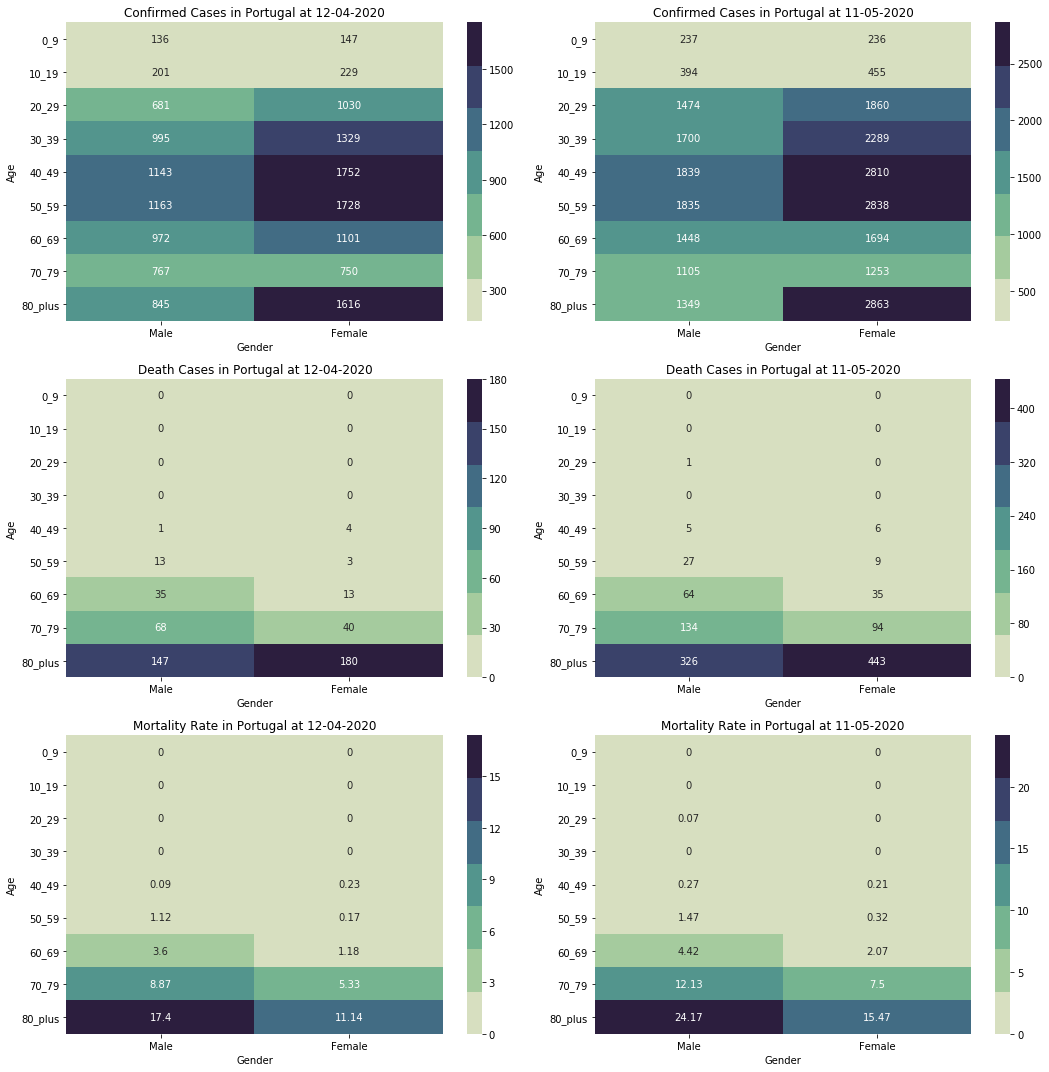

In [46]:
compare_day_with_today(len(dt)-30)

##### Model Building & Predictions (functions)

In [11]:
def build_model(n_days, column):
    
    
    X = [x for x in range(n_days)]
    X = np.reshape(X, (len(X), 1))
    
    Y = np.log(dt[str(column)].loc[:(n_days-1)])
    
    model = linear_model.LinearRegression()
    
    model.fit(X,Y)
    
    #print('Slope: \n', model.coef_)
    #print('Intercept: \n', model.intercept_)
    #print()
    #print('Model: y = e^({} + x * {})'.format(round(float(model.intercept_),3),round(float(model.coef_),3)))
    
    return float(model.intercept_), float(model.coef_)

In [12]:
def predict(column, model_day, get_n_days):
    
    inter, coef = build_model(model_day,column)
    
    X = [x for x in range(get_n_days)]
    
    Y_pred = [np.exp(coef*i + inter) for i in X]
    
    return Y_pred

##### Plot Predictions

In [13]:
def plot_pred(column,model_day,color):
    return plt.plot(dt['data'], predict(column,model_day,len(dt)),
                    label=("Predicted on day "+str(model_day)),
                    color=color,
                    linestyle=':')

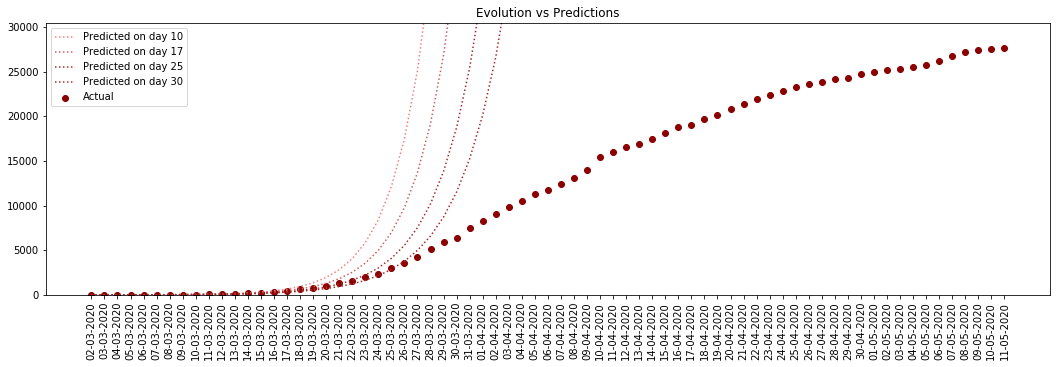

In [51]:
fig7 = plt.figure(figsize=(18,5))
plt.scatter(dt['data'], 'confirmados', data=dt, marker='o', label='Actual', color='darkred')
plot_pred('confirmados',10,'lightcoral')
plot_pred('confirmados',17,'indianred')
plot_pred('confirmados',25,'brown')
plot_pred('confirmados',30,'brown')
plt.xticks(rotation=90)
plt.ylim(0,max(dt['confirmados'])*1.10)
plt.legend()
plt.title('Evolution vs Predictions')

fig7.savefig('Daily Report/evolution_vs_predictions.png')